<a href="https://colab.research.google.com/github/thdfydgh/MilitaryProjectDA/blob/main/%5BProject%5D_%EB%82%A0%EC%94%A8_%EB%B3%80%ED%99%94%EC%97%90_%EB%94%B0%EB%A5%B8_%EA%B5%B0_%EA%B0%90%EC%98%81%EB%B3%8C_%EC%A0%95%EB%B3%B4_EDA_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Project] 날씨 변화에 따른 군 감영볌 정보 EDA 분석 및 데이터 시각화**

## **프로젝트 목표**

- 분기별 군 감염병(폐렴, 수두, 결핵 등) 현황 정보와 날씨 데이터를 활용하여 기온 변화에 따른 군 감염병과의 EDA 분석 및 시각화 프로젝트 수행




##**데이터 출처**



*   https://www.data.go.kr/data/15083055/fileData.do (국방부 군 
감염병 정보)
*   https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56 (기상청 방재기상관측 자료)

##**프로젝트 개요**

1.   이 프로젝트에서는 Pandas 및 Matplotlib를 사용하여 분기별 `군 감염병 현황 데이터`와 `기온 데이터`에 대한 탐색적 데이터 분석(EDA)를 적용하여 색인된 시간 순서로 질병과 기온 변수 레코드의 시계열 데이터를 시각화한다.
2.  탐색적 데이터 분석(EDA) 방법 및 데이터 시각화를 통하여 데이터의 분포와 값을 다양한 각도에서 관찰하며 데이터가 표현하는 현상과 다양한 패턴을 파악할 수 있다.

## **1. 데이터 읽기**


In [1]:
# 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gddrive')

Drive already mounted at /content/gddrive; to attempt to forcibly remount, call drive.mount("/content/gddrive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 데이터 경로 지정
fp1 ='/content/gddrive/MyDrive/Dataset/군 감염병 정보.csv'
fp2 ='/content/gddrive/MyDrive/Dataset/월별 기온 정보.csv'

In [5]:
# csv 파일 읽기
df_disease = pd.read_csv(fp1, encoding='euc-kr') # 군 감염병 정보
df_temperature = pd.read_csv(fp2, parse_dates=['일시'], encoding='euc-kr') # 월별 기온 정보, '일시' 데이터를 datetime으로 설정


In [6]:
# 군 감염병 정보의 행과 열의 개수 확인
df_disease.shape

(373, 5)

In [7]:
# 군 감염병 정보 확인, 첫 5개 데이터 출력
df_disease.head()


,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0


In [8]:
#월별 기온 정보의 행과 열의 개수 확인
df_temperature.shape

(43064, 15)

In [9]:
#월별 기온 정보 확인.
df_temperature.head()

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,12,안면도(감),2015-01-01,0.3,3.3,-2.4,9.6,-6.2,20150105.0,20150101.0,3.4,15.7,337.2,20150101.0,15.5
1,12,안면도(감),2015-02-01,1.4,4.5,-1.2,10.6,-8.5,20150215.0,20150209.0,3.0,16.6,336.4,20150208.0,23.5
2,12,안면도(감),2015-03-01,4.8,8.5,1.5,13.9,-3.8,20150330.0,20150309.0,2.6,18.8,259.6,20150303.0,17.5
3,12,안면도(감),2015-04-01,11.1,14.9,8.0,22.8,3.8,20150428.0,20150408.0,3.2,22.1,162.6,20150402.0,97.0
4,12,안면도(감),2015-05-01,15.0,18.8,11.8,24.7,8.3,20150529.0,20150505.0,2.5,18.2,140.6,20150511.0,24.5


In [10]:
df_temperature.dtypes

지점                                int64
지점명                              object
일시                       datetime64[ns]
평균기온(°C)                        float64
평균최고기온(°C)                      float64
평균최저기온(°C)                      float64
최고기온(°C)                        float64
최저기온(°C)                        float64
최고기온 나타난날(yyyymmdd)             float64
최저기온 나타난날(yyyymmdd)             float64
평균풍속(m/s)                       float64
최대순간풍속(m/s)                     float64
최대순간풍속풍향(deg)                   float64
최대순간풍속 나타난날(yyyymmdd)           float64
월강수량합(mm)                       float64
dtype: object

#**2. 데이터 정제**


#**2.1 결측값 확인**

In [11]:
#열 이름 출력
df_disease.columns.values

array(['연도', '분기구분', '질병명', '현황', '비고'], dtype=object)

In [12]:
# 결측값 확인
df_disease[['연도', '분기구분', '질병명', '현황', '비고']].isna().sum()

연도      0
분기구분    0
질병명     0
현황      0
비고      0
dtype: int64

In [13]:
#열 이름 출력
df_temperature.columns.values

array(['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)',
       '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)',
       '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)'], dtype=object)

In [14]:
# 결측값 확인
df_temperature[['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)',
       '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)',
       '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)']].isna().sum()

지점                         0
지점명                        0
일시                         0
평균기온(°C)                 375
평균최고기온(°C)               414
평균최저기온(°C)               414
최고기온(°C)                  49
최저기온(°C)                  49
최고기온 나타난날(yyyymmdd)       49
최저기온 나타난날(yyyymmdd)       49
평균풍속(m/s)                560
최대순간풍속(m/s)               55
최대순간풍속풍향(deg)            325
최대순간풍속 나타난날(yyyymmdd)     55
월강수량합(mm)                  1
dtype: int64

In [15]:
# 뒷 행 데이터로 결측치 채우기.
# 각 열의 평균 값으로 결측치 채우기 => df.fillna(df.mean())	
# 앞 행의 값으로 결측치 채우기 => df.fillna(method='bfill')	
df_temperature.fillna(method='ffill', inplace = True)

In [16]:
df_temperature[['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)',
       '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)',
       '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)']].isna().sum()

지점                       0
지점명                      0
일시                       0
평균기온(°C)                 0
평균최고기온(°C)               0
평균최저기온(°C)               0
최고기온(°C)                 0
최저기온(°C)                 0
최고기온 나타난날(yyyymmdd)      0
최저기온 나타난날(yyyymmdd)      0
평균풍속(m/s)                0
최대순간풍속(m/s)              0
최대순간풍속풍향(deg)            0
최대순간풍속 나타난날(yyyymmdd)    0
월강수량합(mm)                0
dtype: int64

#**3. 데이터 시각화**

분기별 감염병 데이터의 시각화
분기별 감염병 현황 그래프

##**3.1 분기별 감염병 현황 시각화**

*   군 감염병 정보의 현황 컬럼 데이터를 시각화
*   분기별로 처리하기 위해 연도와 분기구분 컬럼 데이터를 인덱스로 만들어서 처리

In [17]:
# 연도와 분기구분 별로 데이터 합계 구하기
df_disease2 = df_disease.groupby(['연도', '분기구분'])['현황'].sum()
df_disease2

연도    분기구분
2015  2       285
      3       206
      4       211
2016  1       167
      2       229
      3       213
      4       161
2017  1       197
      2       208
      3       196
      4       139
2018  1       112
      2       194
      3       526
      4       735
2019  1       612
      2       756
      3       586
      4        99
2020  1        52
      2        50
      3        66
      4        39
2021  1        32
      2        44
      3        44
      4        26
Name: 현황, dtype: int64

In [18]:
# 인덱스 재설정
df_temp = df_disease2.reset_index()

In [18]:
df_temp

,연도,분기구분,현황
0,2015,2,285
1,2015,3,206
2,2015,4,211
3,2016,1,167
4,2016,2,229
5,2016,3,213
6,2016,4,161
7,2017,1,197
8,2017,2,208
9,2017,3,196


In [19]:
df_temp.dtypes

연도      int64
분기구분    int64
현황      int64
dtype: object

In [20]:
df_temp['분기'] = df_temp['연도'].astype(str) + '-' + df_temp['분기구분'].astype(str)
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


<ipython-input-21-b8080baff64d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


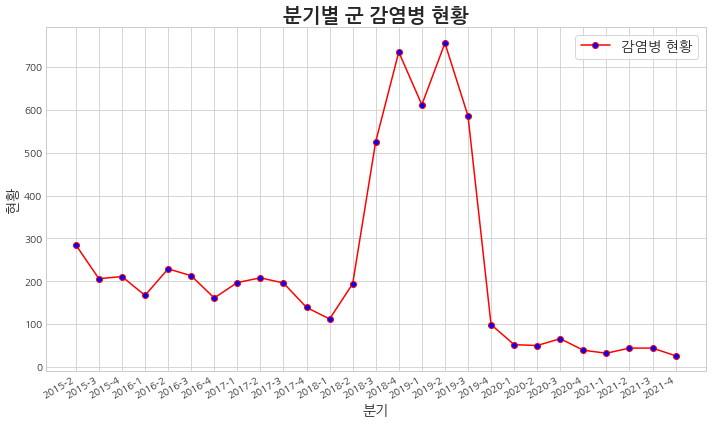

In [21]:
 # 그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'NanumGothic') # 한글 설정

#그래프 속성 지정하기
fig, ax = plt.subplots(1, figsize = (10,6))

# X축, Y축 지정하기
x = df_temp.분기
y = df_temp.현황

# 그래프 데이터와 속성 설정하기
plt.plot(x,y, color = 'red', linestyle ='-', marker = 'o', mfc = 'blue')

fig.autofmt_xdate()

#그래프 제목 및 속성 설정하기
plt.title('분기별 군 감염병 현황',fontdict = {'fontsize' : 20, 'weight': 'bold'})

#X축, Y축 제목 설정하기
plt.xlabel('분기', fontdict ={'fontsize' : 14})
plt.ylabel('현황', fontdict ={'fontsize' : 14})

#그래프 안에 레전드 넣기
plt.legend(['감염병 현황'], frameon = True, fontsize = 'x-large')

plt.tight_layout()

##**3.2 분기별 기온 시각화**

월별 기온 정보 에 있는 데이터를 분기별로 시각화

In [22]:
df_temperature

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,12,안면도(감),2015-01-01,0.3,3.3,-2.4,9.6,-6.2,20150105.0,20150101.0,3.4,15.7,337.2,20150101.0,15.5
1,12,안면도(감),2015-02-01,1.4,4.5,-1.2,10.6,-8.5,20150215.0,20150209.0,3.0,16.6,336.4,20150208.0,23.5
2,12,안면도(감),2015-03-01,4.8,8.5,1.5,13.9,-3.8,20150330.0,20150309.0,2.6,18.8,259.6,20150303.0,17.5
3,12,안면도(감),2015-04-01,11.1,14.9,8.0,22.8,3.8,20150428.0,20150408.0,3.2,22.1,162.6,20150402.0,97.0
4,12,안면도(감),2015-05-01,15.0,18.8,11.8,24.7,8.3,20150529.0,20150505.0,2.5,18.2,140.6,20150511.0,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43059,990,낙천,2021-12-01,7.8,11.1,4.4,16.0,-1.6,20211208.0,20211226.0,5.0,24.0,299.5,20211217.0,23.5
43060,991,옥포,2021-11-01,7.8,11.1,4.4,19.2,-4.0,20211120.0,20211128.0,5.0,16.8,290.2,20211130.0,14.5
43061,991,옥포,2021-12-01,2.0,8.8,-4.0,15.1,-11.4,20211221.0,20211226.0,2.2,19.5,328.7,20211217.0,0.0
43062,992,하빈,2021-11-01,2.0,8.8,-4.0,19.0,-5.4,20211119.0,20211128.0,2.2,13.8,306.8,20211130.0,12.5


In [23]:
# '일시' 열을 인덱스로 지정하기
df_temperature.set_index('일시', inplace=True)
df_temperature.head()

,지점,지점명,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
일시,,,,,,,,,,,,,,
2015-01-01,12,안면도(감),0.3,3.3,-2.4,9.6,-6.2,20150105.0,20150101.0,3.4,15.7,337.2,20150101.0,15.5
2015-02-01,12,안면도(감),1.4,4.5,-1.2,10.6,-8.5,20150215.0,20150209.0,3.0,16.6,336.4,20150208.0,23.5
2015-03-01,12,안면도(감),4.8,8.5,1.5,13.9,-3.8,20150330.0,20150309.0,2.6,18.8,259.6,20150303.0,17.5
2015-04-01,12,안면도(감),11.1,14.9,8.0,22.8,3.8,20150428.0,20150408.0,3.2,22.1,162.6,20150402.0,97.0
2015-05-01,12,안면도(감),15.0,18.8,11.8,24.7,8.3,20150529.0,20150505.0,2.5,18.2,140.6,20150511.0,24.5


In [24]:
# resample 메서드를 활용하여 분기별로 모든 관측지역의 평균 기온을 구하기
quarterly_data = round(df_temperature['평균기온(°C)'].resample('Q').mean(), 2)
quarterly_data.head()

일시
2015-03-31     2.38
2015-06-30    16.67
2015-09-30    22.62
2015-12-31     9.01
2016-03-31     2.09
Freq: Q-DEC, Name: 평균기온(°C), dtype: float64

In [25]:
# 분기별 평균 기온 데이터 인덱스 재설정 하여 '일시' 데이터를 열로 만들기
quarterly_data = quarterly_data.reset_index()
quarterly_data.head()

,일시,평균기온(°C)
0,2015-03-31,2.38
1,2015-06-30,16.67
2,2015-09-30,22.62
3,2015-12-31,9.01
4,2016-03-31,2.09


In [26]:
# '일시'컬럼의 데이터를 '분기'컬럼으로 저장하기
quarterly_data['분기'] = quarterly_data['일시'].dt.year.astype(str) + '-' + quarterly_data['일시'].dt.quarter.astype(str) 
quarterly_data.head()

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.67,2015-2
2,2015-09-30,22.62,2015-3
3,2015-12-31,9.01,2015-4
4,2016-03-31,2.09,2016-1


<ipython-input-27-0ed745d035ed>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-27-0ed745d035ed>:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


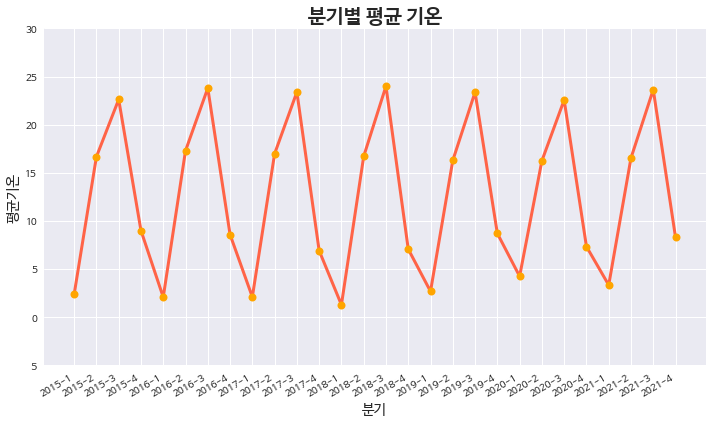

In [27]:
# 그래프 스타일 지정하기
plt.style.use('seaborn')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize=(10, 6))

# x, y축 데이터 설정하기
x = quarterly_data['분기']
y = quarterly_data['평균기온(°C)']

# y축 제한 설정하기
plt.ylim(-5, 30)

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'tomato',  linestyle='-', marker='o',  mfc='orange', linewidth = 3, markersize = 8)

#plt.grid(axis = 'x')
fig.autofmt_xdate()

# 그래프 제목 및 속성 설정하기
plt.title('분기별 평균 기온', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('평균기온', fontdict={'fontsize': 14})

plt.tight_layout()